In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/acm-sf-chapter-hackathon-small/popular_skus.csv
/kaggle/input/acm-sf-chapter-hackathon-small/small_product_data.xml
/kaggle/input/acm-sf-chapter-hackathon-small/train.csv
/kaggle/input/acm-sf-chapter-hackathon-small/popular_skus.py
/kaggle/input/acm-sf-chapter-hackathon-small/test.csv


In [2]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import datasets, linear_model, metrics
from matplotlib import pyplot
import time
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline

In [3]:
train= pd.read_csv('/kaggle/input/acm-sf-chapter-hackathon-small/train.csv')
test= pd.read_csv('/kaggle/input/acm-sf-chapter-hackathon-small/test.csv')

In [4]:
sample_submission = pd.read_csv('/kaggle/input/acm-sf-chapter-hackathon-small/popular_skus.csv')

In [5]:
train.head()


,user,sku,category,query,click_time,query_time
0,0001cd0d10bbc585c9ba287c963e00873d4c0bfd,2032076,abcat0701002,gears of war,2011-10-09 17:22:56.101,2011-10-09 17:21:42.917
1,00033dbced6acd3626c4b56ff5c55b8d69911681,9854804,abcat0701002,Gears of war,2011-09-25 13:35:42.198,2011-09-25 13:35:33.234
2,00033dbced6acd3626c4b56ff5c55b8d69911681,2670133,abcat0701002,Gears of war,2011-09-25 13:36:08.668,2011-09-25 13:35:33.234
3,00033dbced6acd3626c4b56ff5c55b8d69911681,9984142,abcat0701002,Assassin creed,2011-09-25 13:37:23.709,2011-09-25 13:37:00.049
4,0007756f015345450f7be1df33695421466b7ce4,2541184,abcat0701002,dead island,2011-09-11 15:15:34.336,2011-09-11 15:15:26.206


In [6]:
test.head()

,user,category,query,click_time,query_time
0,00025eb02b249434554fe2cacd8562db325df127,abcat0701002,child eden,2011-09-02 13:05:24.146,2011-09-02 13:04:34.633
1,00033dbced6acd3626c4b56ff5c55b8d69911681,abcat0701002,Revelations,2011-09-25 13:38:14.74,2011-09-25 13:37:58.382
2,000548d17532b70071b7d59edd4797aed1823c60,abcat0701002,Gears of war,2011-09-16 17:34:43.596,2011-09-16 17:33:43.237
3,0006f15231a422156a9d005735d0969a5e5a0ac4,abcat0701002,batman,2011-10-09 11:14:48.352,2011-10-09 11:14:33.692
4,000a16ce5371b0fb3ad0c7f6183a5476b434a95b,abcat0701002,Assassins creed: revelations,2011-09-05 00:31:53.083,2011-09-05 00:31:39.761


In [7]:
train.shape, test.shape

((42365, 6), (28241, 5))

In [8]:
train.dtypes


user          object
sku            int64
category      object
query         object
click_time    object
query_time    object
dtype: object

In [9]:
sample_submission

,sku
0,9854804 2107458 2541184 2670133 2173065
1,9854804 2107458 2541184 2670133 2173065
2,9854804 2107458 2541184 2670133 2173065
3,9854804 2107458 2541184 2670133 2173065
4,9854804 2107458 2541184 2670133 2173065
...,...
28236,9854804 2107458 2541184 2670133 2173065
28237,9854804 2107458 2541184 2670133 2173065
28238,9854804 2107458 2541184 2670133 2173065
28239,9854804 2107458 2541184 2670133 2173065


### New Features using datetime from 'click_time'

#### 1- For 'click_time'

In [10]:
# For train data
train['click_time']= pd.to_datetime(train['click_time'])
train['click_time_year'] = train['click_time'].dt.year
train['click_time_month'] =  train['click_time'].dt.month
train['click_time_quarter'] = train['click_time'].dt.quarter
train['click_time_dow'] = train['click_time'].dt.dayofweek # Monday = 0 & Sunday = 6
# train['dayofweek_name'] = train['instock_date'].dt.day_name()
#train["week_of_the_year"] =  train['instock_date'].dt.weekofyear
train['click_time_doy'] = train['click_time'].dt.dayofyear
train["click_time_hour"] = train['click_time'].dt.hour

In [11]:
train.head()

,user,sku,category,query,click_time,query_time,click_time_year,click_time_month,click_time_quarter,click_time_dow,click_time_doy,click_time_hour
0,0001cd0d10bbc585c9ba287c963e00873d4c0bfd,2032076,abcat0701002,gears of war,2011-10-09 17:22:56.101,2011-10-09 17:21:42.917,2011,10,4,6,282,17
1,00033dbced6acd3626c4b56ff5c55b8d69911681,9854804,abcat0701002,Gears of war,2011-09-25 13:35:42.198,2011-09-25 13:35:33.234,2011,9,3,6,268,13
2,00033dbced6acd3626c4b56ff5c55b8d69911681,2670133,abcat0701002,Gears of war,2011-09-25 13:36:08.668,2011-09-25 13:35:33.234,2011,9,3,6,268,13
3,00033dbced6acd3626c4b56ff5c55b8d69911681,9984142,abcat0701002,Assassin creed,2011-09-25 13:37:23.709,2011-09-25 13:37:00.049,2011,9,3,6,268,13
4,0007756f015345450f7be1df33695421466b7ce4,2541184,abcat0701002,dead island,2011-09-11 15:15:34.336,2011-09-11 15:15:26.206,2011,9,3,6,254,15


In [12]:
# For test data
test['click_time']= pd.to_datetime(test['click_time'])
test['click_time_year'] = test['click_time'].dt.year
test['click_time_month'] =  test['click_time'].dt.month
test['click_time_quarter'] = test['click_time'].dt.quarter
test['click_time_dow'] = test['click_time'].dt.dayofweek # Monday = 0 & Sunday = 6
# train['dayofweek_name'] = train['instock_date'].dt.day_name()
#train["week_of_the_year"] =  train['instock_date'].dt.weekofyear
test['click_time_doy'] = test['click_time'].dt.dayofyear
test["click_time_hour"] = test['click_time'].dt.hour

In [13]:
test.head()

,user,category,query,click_time,query_time,click_time_year,click_time_month,click_time_quarter,click_time_dow,click_time_doy,click_time_hour
0,00025eb02b249434554fe2cacd8562db325df127,abcat0701002,child eden,2011-09-02 13:05:24.146,2011-09-02 13:04:34.633,2011,9,3,4,245,13
1,00033dbced6acd3626c4b56ff5c55b8d69911681,abcat0701002,Revelations,2011-09-25 13:38:14.740,2011-09-25 13:37:58.382,2011,9,3,6,268,13
2,000548d17532b70071b7d59edd4797aed1823c60,abcat0701002,Gears of war,2011-09-16 17:34:43.596,2011-09-16 17:33:43.237,2011,9,3,4,259,17
3,0006f15231a422156a9d005735d0969a5e5a0ac4,abcat0701002,batman,2011-10-09 11:14:48.352,2011-10-09 11:14:33.692,2011,10,4,6,282,11
4,000a16ce5371b0fb3ad0c7f6183a5476b434a95b,abcat0701002,Assassins creed: revelations,2011-09-05 00:31:53.083,2011-09-05 00:31:39.761,2011,9,3,0,248,0


#### 2- For 'query_time'

In [14]:
# For train data
train['query_time']= pd.to_datetime(train['query_time'])
train['query_time_year'] = train['query_time'].dt.year
train['query_time_month'] =  train['query_time'].dt.month
train['query_time_quarter'] = train['query_time'].dt.quarter
train['query_time_dow'] = train['query_time'].dt.dayofweek # Monday = 0 & Sunday = 6
# train['dayofweek_name'] = train['instock_date'].dt.day_name()
#train["week_of_the_year"] =  train['instock_date'].dt.weekofyear
train['query_time_doy'] = train['query_time'].dt.dayofyear
train["query_time_hour"] = train['query_time'].dt.hour

In [15]:
train.head()

,user,sku,category,query,click_time,query_time,click_time_year,click_time_month,click_time_quarter,click_time_dow,click_time_doy,click_time_hour,query_time_year,query_time_month,query_time_quarter,query_time_dow,query_time_doy,query_time_hour
0,0001cd0d10bbc585c9ba287c963e00873d4c0bfd,2032076,abcat0701002,gears of war,2011-10-09 17:22:56.101,2011-10-09 17:21:42.917,2011,10,4,6,282,17,2011,10,4,6,282,17
1,00033dbced6acd3626c4b56ff5c55b8d69911681,9854804,abcat0701002,Gears of war,2011-09-25 13:35:42.198,2011-09-25 13:35:33.234,2011,9,3,6,268,13,2011,9,3,6,268,13
2,00033dbced6acd3626c4b56ff5c55b8d69911681,2670133,abcat0701002,Gears of war,2011-09-25 13:36:08.668,2011-09-25 13:35:33.234,2011,9,3,6,268,13,2011,9,3,6,268,13
3,00033dbced6acd3626c4b56ff5c55b8d69911681,9984142,abcat0701002,Assassin creed,2011-09-25 13:37:23.709,2011-09-25 13:37:00.049,2011,9,3,6,268,13,2011,9,3,6,268,13
4,0007756f015345450f7be1df33695421466b7ce4,2541184,abcat0701002,dead island,2011-09-11 15:15:34.336,2011-09-11 15:15:26.206,2011,9,3,6,254,15,2011,9,3,6,254,15


In [16]:
# For test data
test['query_time']= pd.to_datetime(test['query_time'])
test['query_time_year'] = test['query_time'].dt.year
test['query_time_month'] =  test['query_time'].dt.month
test['query_time_quarter'] = test['query_time'].dt.quarter
test['query_time_dow'] = test['query_time'].dt.dayofweek # Monday = 0 & Sunday = 6
# train['dayofweek_name'] = train['instock_date'].dt.day_name()
#train["week_of_the_year"] =  train['instock_date'].dt.weekofyear
test['query_time_doy'] = test['query_time'].dt.dayofyear
test["query_time_hour"] = test['query_time'].dt.hour

In [17]:
test.head()

,user,category,query,click_time,query_time,click_time_year,click_time_month,click_time_quarter,click_time_dow,click_time_doy,click_time_hour,query_time_year,query_time_month,query_time_quarter,query_time_dow,query_time_doy,query_time_hour
0,00025eb02b249434554fe2cacd8562db325df127,abcat0701002,child eden,2011-09-02 13:05:24.146,2011-09-02 13:04:34.633,2011,9,3,4,245,13,2011,9,3,4,245,13
1,00033dbced6acd3626c4b56ff5c55b8d69911681,abcat0701002,Revelations,2011-09-25 13:38:14.740,2011-09-25 13:37:58.382,2011,9,3,6,268,13,2011,9,3,6,268,13
2,000548d17532b70071b7d59edd4797aed1823c60,abcat0701002,Gears of war,2011-09-16 17:34:43.596,2011-09-16 17:33:43.237,2011,9,3,4,259,17,2011,9,3,4,259,17
3,0006f15231a422156a9d005735d0969a5e5a0ac4,abcat0701002,batman,2011-10-09 11:14:48.352,2011-10-09 11:14:33.692,2011,10,4,6,282,11,2011,10,4,6,282,11
4,000a16ce5371b0fb3ad0c7f6183a5476b434a95b,abcat0701002,Assassins creed: revelations,2011-09-05 00:31:53.083,2011-09-05 00:31:39.761,2011,9,3,0,248,0,2011,9,3,0,248,0


In [18]:
train.dtypes

user                          object
sku                            int64
category                      object
query                         object
click_time            datetime64[ns]
query_time            datetime64[ns]
click_time_year                int64
click_time_month               int64
click_time_quarter             int64
click_time_dow                 int64
click_time_doy                 int64
click_time_hour                int64
query_time_year                int64
query_time_month               int64
query_time_quarter             int64
query_time_dow                 int64
query_time_doy                 int64
query_time_hour                int64
dtype: object

#### 3- click-query

In [19]:
train['click_querry'] = train['click_time']-train['query_time']

In [20]:
train.head()

,user,sku,category,query,click_time,query_time,click_time_year,click_time_month,click_time_quarter,click_time_dow,click_time_doy,click_time_hour,query_time_year,query_time_month,query_time_quarter,query_time_dow,query_time_doy,query_time_hour,click_querry
0,0001cd0d10bbc585c9ba287c963e00873d4c0bfd,2032076,abcat0701002,gears of war,2011-10-09 17:22:56.101,2011-10-09 17:21:42.917,2011,10,4,6,282,17,2011,10,4,6,282,17,0 days 00:01:13.184000
1,00033dbced6acd3626c4b56ff5c55b8d69911681,9854804,abcat0701002,Gears of war,2011-09-25 13:35:42.198,2011-09-25 13:35:33.234,2011,9,3,6,268,13,2011,9,3,6,268,13,0 days 00:00:08.964000
2,00033dbced6acd3626c4b56ff5c55b8d69911681,2670133,abcat0701002,Gears of war,2011-09-25 13:36:08.668,2011-09-25 13:35:33.234,2011,9,3,6,268,13,2011,9,3,6,268,13,0 days 00:00:35.434000
3,00033dbced6acd3626c4b56ff5c55b8d69911681,9984142,abcat0701002,Assassin creed,2011-09-25 13:37:23.709,2011-09-25 13:37:00.049,2011,9,3,6,268,13,2011,9,3,6,268,13,0 days 00:00:23.660000
4,0007756f015345450f7be1df33695421466b7ce4,2541184,abcat0701002,dead island,2011-09-11 15:15:34.336,2011-09-11 15:15:26.206,2011,9,3,6,254,15,2011,9,3,6,254,15,0 days 00:00:08.130000


In [21]:
train.dtypes

user                           object
sku                             int64
category                       object
query                          object
click_time             datetime64[ns]
query_time             datetime64[ns]
click_time_year                 int64
click_time_month                int64
click_time_quarter              int64
click_time_dow                  int64
click_time_doy                  int64
click_time_hour                 int64
query_time_year                 int64
query_time_month                int64
query_time_quarter              int64
query_time_dow                  int64
query_time_doy                  int64
query_time_hour                 int64
click_querry          timedelta64[ns]
dtype: object

In [22]:
train['click_querry_min'] = train['click_querry'].dt.total_seconds()/60

In [23]:
train.head()

,user,sku,category,query,click_time,query_time,click_time_year,click_time_month,click_time_quarter,click_time_dow,click_time_doy,click_time_hour,query_time_year,query_time_month,query_time_quarter,query_time_dow,query_time_doy,query_time_hour,click_querry,click_querry_min
0,0001cd0d10bbc585c9ba287c963e00873d4c0bfd,2032076,abcat0701002,gears of war,2011-10-09 17:22:56.101,2011-10-09 17:21:42.917,2011,10,4,6,282,17,2011,10,4,6,282,17,0 days 00:01:13.184000,1.219733
1,00033dbced6acd3626c4b56ff5c55b8d69911681,9854804,abcat0701002,Gears of war,2011-09-25 13:35:42.198,2011-09-25 13:35:33.234,2011,9,3,6,268,13,2011,9,3,6,268,13,0 days 00:00:08.964000,0.149400
2,00033dbced6acd3626c4b56ff5c55b8d69911681,2670133,abcat0701002,Gears of war,2011-09-25 13:36:08.668,2011-09-25 13:35:33.234,2011,9,3,6,268,13,2011,9,3,6,268,13,0 days 00:00:35.434000,0.590567
3,00033dbced6acd3626c4b56ff5c55b8d69911681,9984142,abcat0701002,Assassin creed,2011-09-25 13:37:23.709,2011-09-25 13:37:00.049,2011,9,3,6,268,13,2011,9,3,6,268,13,0 days 00:00:23.660000,0.394333
4,0007756f015345450f7be1df33695421466b7ce4,2541184,abcat0701002,dead island,2011-09-11 15:15:34.336,2011-09-11 15:15:26.206,2011,9,3,6,254,15,2011,9,3,6,254,15,0 days 00:00:08.130000,0.135500


In [24]:
test['click_querry'] = test['click_time']-test['query_time']
test['click_querry_min'] = test['click_querry'].dt.total_seconds()/60

In [25]:
test.head()

,user,category,query,click_time,query_time,click_time_year,click_time_month,click_time_quarter,click_time_dow,click_time_doy,click_time_hour,query_time_year,query_time_month,query_time_quarter,query_time_dow,query_time_doy,query_time_hour,click_querry,click_querry_min
0,00025eb02b249434554fe2cacd8562db325df127,abcat0701002,child eden,2011-09-02 13:05:24.146,2011-09-02 13:04:34.633,2011,9,3,4,245,13,2011,9,3,4,245,13,0 days 00:00:49.513000,0.825217
1,00033dbced6acd3626c4b56ff5c55b8d69911681,abcat0701002,Revelations,2011-09-25 13:38:14.740,2011-09-25 13:37:58.382,2011,9,3,6,268,13,2011,9,3,6,268,13,0 days 00:00:16.358000,0.272633
2,000548d17532b70071b7d59edd4797aed1823c60,abcat0701002,Gears of war,2011-09-16 17:34:43.596,2011-09-16 17:33:43.237,2011,9,3,4,259,17,2011,9,3,4,259,17,0 days 00:01:00.359000,1.005983
3,0006f15231a422156a9d005735d0969a5e5a0ac4,abcat0701002,batman,2011-10-09 11:14:48.352,2011-10-09 11:14:33.692,2011,10,4,6,282,11,2011,10,4,6,282,11,0 days 00:00:14.660000,0.244333
4,000a16ce5371b0fb3ad0c7f6183a5476b434a95b,abcat0701002,Assassins creed: revelations,2011-09-05 00:31:53.083,2011-09-05 00:31:39.761,2011,9,3,0,248,0,2011,9,3,0,248,0,0 days 00:00:13.322000,0.222033


In [26]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42365 entries, 0 to 42364
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   user                42365 non-null  object         
 1   sku                 42365 non-null  int64          
 2   category            42365 non-null  object         
 3   query               42365 non-null  object         
 4   click_time          42365 non-null  datetime64[ns] 
 5   query_time          42365 non-null  datetime64[ns] 
 6   click_time_year     42365 non-null  int64          
 7   click_time_month    42365 non-null  int64          
 8   click_time_quarter  42365 non-null  int64          
 9   click_time_dow      42365 non-null  int64          
 10  click_time_doy      42365 non-null  int64          
 11  click_time_hour     42365 non-null  int64          
 12  query_time_year     42365 non-null  int64          
 13  query_time_month    42365 non-n

In [27]:
# Finding number of null values in each column
train.isnull().sum()

user                  0
sku                   0
category              0
query                 0
click_time            0
query_time            0
click_time_year       0
click_time_month      0
click_time_quarter    0
click_time_dow        0
click_time_doy        0
click_time_hour       0
query_time_year       0
query_time_month      0
query_time_quarter    0
query_time_dow        0
query_time_doy        0
query_time_hour       0
click_querry          0
click_querry_min      0
dtype: int64

In [28]:
train.head()

,user,sku,category,query,click_time,query_time,click_time_year,click_time_month,click_time_quarter,click_time_dow,click_time_doy,click_time_hour,query_time_year,query_time_month,query_time_quarter,query_time_dow,query_time_doy,query_time_hour,click_querry,click_querry_min
0,0001cd0d10bbc585c9ba287c963e00873d4c0bfd,2032076,abcat0701002,gears of war,2011-10-09 17:22:56.101,2011-10-09 17:21:42.917,2011,10,4,6,282,17,2011,10,4,6,282,17,0 days 00:01:13.184000,1.219733
1,00033dbced6acd3626c4b56ff5c55b8d69911681,9854804,abcat0701002,Gears of war,2011-09-25 13:35:42.198,2011-09-25 13:35:33.234,2011,9,3,6,268,13,2011,9,3,6,268,13,0 days 00:00:08.964000,0.149400
2,00033dbced6acd3626c4b56ff5c55b8d69911681,2670133,abcat0701002,Gears of war,2011-09-25 13:36:08.668,2011-09-25 13:35:33.234,2011,9,3,6,268,13,2011,9,3,6,268,13,0 days 00:00:35.434000,0.590567
3,00033dbced6acd3626c4b56ff5c55b8d69911681,9984142,abcat0701002,Assassin creed,2011-09-25 13:37:23.709,2011-09-25 13:37:00.049,2011,9,3,6,268,13,2011,9,3,6,268,13,0 days 00:00:23.660000,0.394333
4,0007756f015345450f7be1df33695421466b7ce4,2541184,abcat0701002,dead island,2011-09-11 15:15:34.336,2011-09-11 15:15:26.206,2011,9,3,6,254,15,2011,9,3,6,254,15,0 days 00:00:08.130000,0.135500


In [29]:
for col in train.columns:
  print(col,train[col].nunique())

user 38024
sku 413
category 1
query 5960
click_time 42364
query_time 40385
click_time_year 1
click_time_month 3
click_time_quarter 2
click_time_dow 7
click_time_doy 82
click_time_hour 24
query_time_year 1
query_time_month 3
query_time_quarter 2
query_time_dow 7
query_time_doy 82
query_time_hour 24
click_querry 33068
click_querry_min 33068


#### EDA

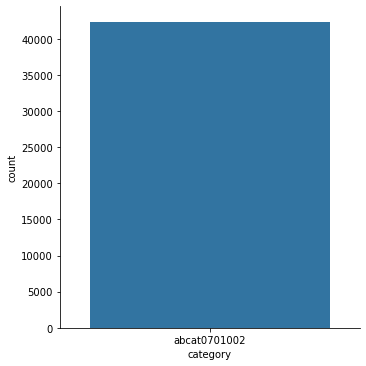

In [30]:
# Analysing different categorical values
sns.catplot(x="category", kind="count", data=train)

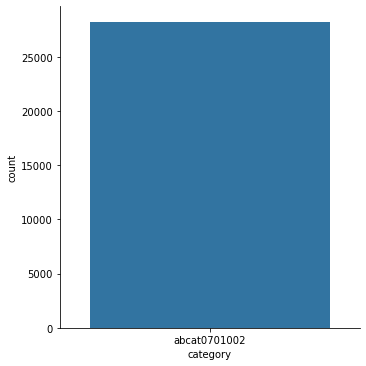

In [31]:
sns.catplot(x="category", kind="count", data=test)

In [32]:
test.category.nunique()

1

In [33]:
train.head()

,user,sku,category,query,click_time,query_time,click_time_year,click_time_month,click_time_quarter,click_time_dow,click_time_doy,click_time_hour,query_time_year,query_time_month,query_time_quarter,query_time_dow,query_time_doy,query_time_hour,click_querry,click_querry_min
0,0001cd0d10bbc585c9ba287c963e00873d4c0bfd,2032076,abcat0701002,gears of war,2011-10-09 17:22:56.101,2011-10-09 17:21:42.917,2011,10,4,6,282,17,2011,10,4,6,282,17,0 days 00:01:13.184000,1.219733
1,00033dbced6acd3626c4b56ff5c55b8d69911681,9854804,abcat0701002,Gears of war,2011-09-25 13:35:42.198,2011-09-25 13:35:33.234,2011,9,3,6,268,13,2011,9,3,6,268,13,0 days 00:00:08.964000,0.149400
2,00033dbced6acd3626c4b56ff5c55b8d69911681,2670133,abcat0701002,Gears of war,2011-09-25 13:36:08.668,2011-09-25 13:35:33.234,2011,9,3,6,268,13,2011,9,3,6,268,13,0 days 00:00:35.434000,0.590567
3,00033dbced6acd3626c4b56ff5c55b8d69911681,9984142,abcat0701002,Assassin creed,2011-09-25 13:37:23.709,2011-09-25 13:37:00.049,2011,9,3,6,268,13,2011,9,3,6,268,13,0 days 00:00:23.660000,0.394333
4,0007756f015345450f7be1df33695421466b7ce4,2541184,abcat0701002,dead island,2011-09-11 15:15:34.336,2011-09-11 15:15:26.206,2011,9,3,6,254,15,2011,9,3,6,254,15,0 days 00:00:08.130000,0.135500


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


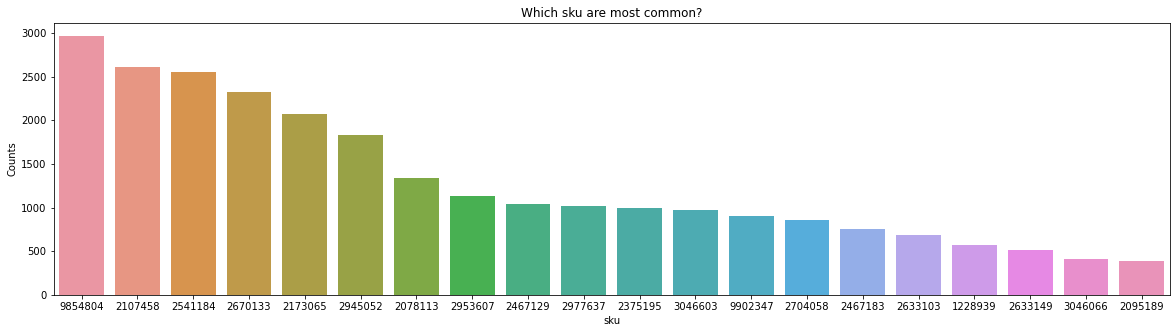

In [34]:
# Plotting 1st 20 sku values in the decreasing order of their count
sku_counts = train.sku.value_counts().sort_values(ascending=False).iloc[0:20] 
plt.figure(figsize=(20,5))
sns.barplot(sku_counts.index, sku_counts.values, order=sku_counts.index)
plt.ylabel("Counts")
plt.xlabel("sku")
plt.title("Which sku are most common?");


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


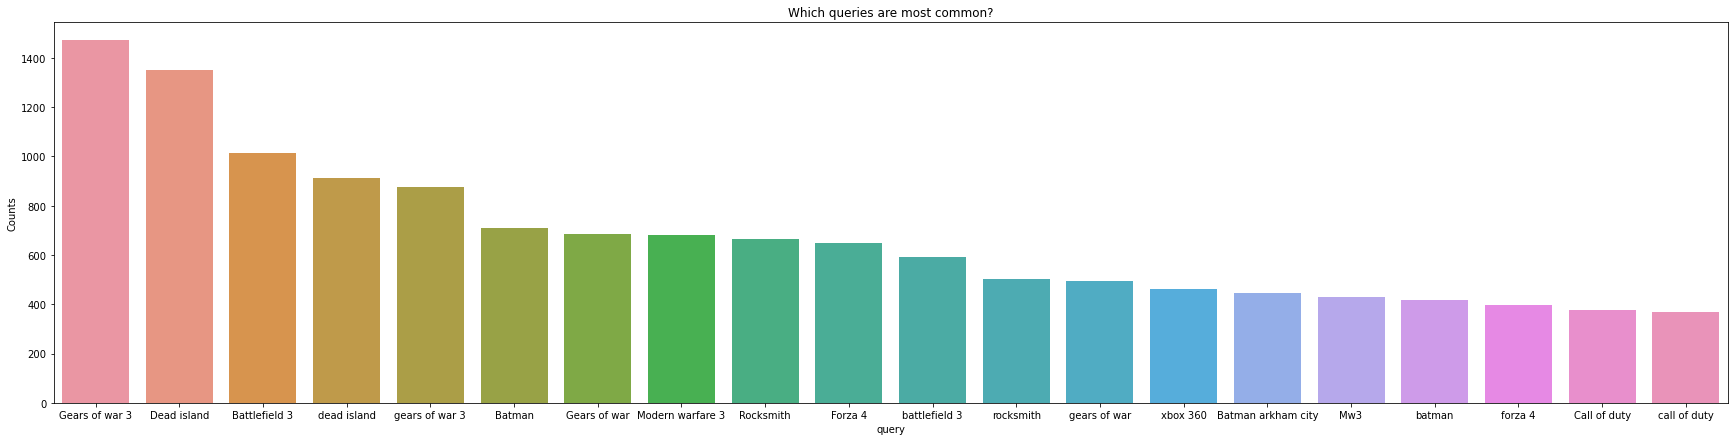

In [35]:
# Plotting 1st 20 query values in the decreasing order of their count, for train data
query_counts = train['query'].value_counts().sort_values(ascending=False).iloc[0:20] 
plt.figure(figsize=(30,7))
sns.barplot(query_counts.index, query_counts.values, order=query_counts.index)
plt.ylabel("Counts")
plt.xlabel("query")
plt.title("Which queries are most common?");


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


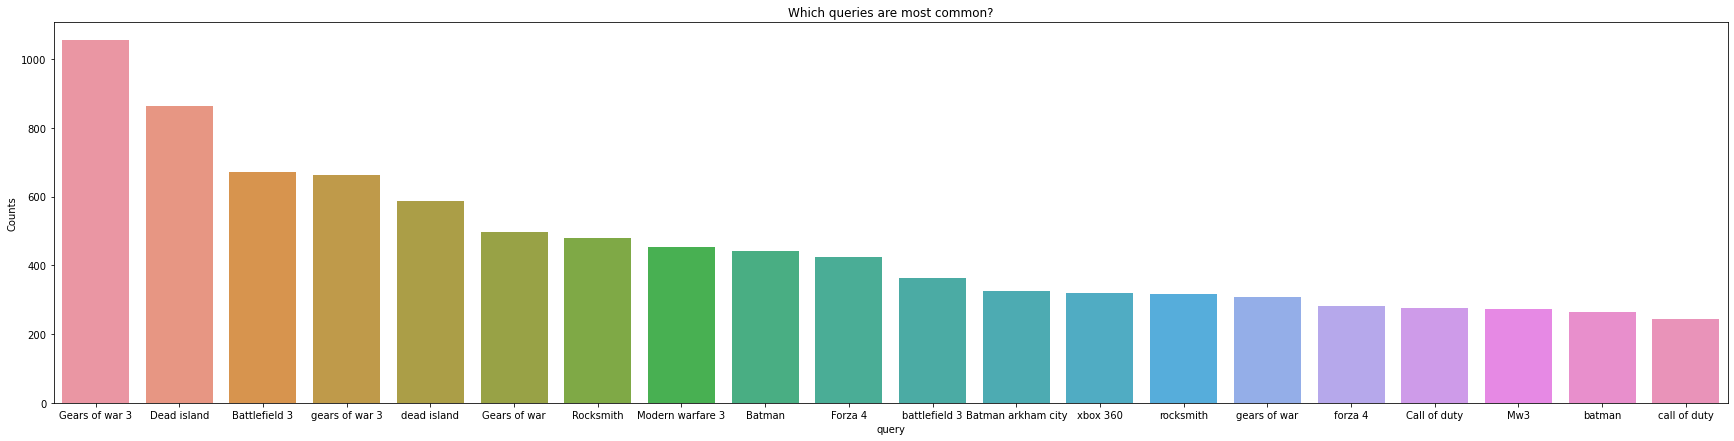

In [36]:
# Plotting 1st 20 query values in the decreasing order of their count, for test data
query_counts = test['query'].value_counts().sort_values(ascending=False).iloc[0:20] 
plt.figure(figsize=(30,7))
sns.barplot(query_counts.index, query_counts.values, order=query_counts.index)
plt.ylabel("Counts")
plt.xlabel("query")
plt.title("Which queries are most common?");


In [37]:
# Thus we observe from the above plot that some queries have high count while others are very few. There is a class imbalance problem.
train['query'].value_counts()

Gears of war 3                     1471
Dead island                        1350
Battlefield 3                      1012
dead island                         911
gears of war 3                      877
                                   ... 
l a noir                              1
Gears of war 3 remote                 1
Froza motorsport 4                    1
battlefield 2 bad company  xbox       1
Rcksmith                              1
Name: query, Length: 5960, dtype: int64

In [38]:
train['query'].nunique()

5960

In [39]:
train.click_querry_min.describe()

count    42365.000000
mean         0.835680
std          0.945365
min          0.000400
25%          0.237483
50%          0.471833
75%          1.001000
max          4.998183
Name: click_querry_min, dtype: float64

In [40]:
# So, we see that (as per given instructions), the click_time is never more than five minutes after the query_time.

<AxesSubplot:ylabel='click_querry_min'>

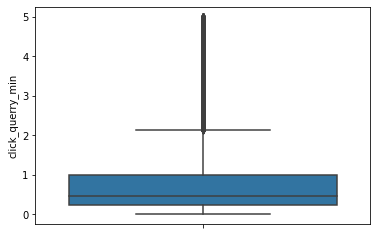

In [41]:
sns.boxplot(y='click_querry_min', data = train) 

#### Frequency encoding of categorical column= train['query']

In [42]:
train['query'].value_counts().to_dict()

{'Gears of war 3': 1471,
 'Dead island': 1350,
 'Battlefield 3': 1012,
 'dead island': 911,
 'gears of war 3': 877,
 'Batman': 709,
 'Gears of war': 685,
 'Modern warfare 3': 682,
 'Rocksmith': 665,
 'Forza 4': 648,
 'battlefield 3': 590,
 'rocksmith': 502,
 'gears of war': 496,
 'xbox 360': 463,
 'Batman arkham city': 445,
 'Mw3': 431,
 'batman': 416,
 'forza 4': 398,
 'Call of duty': 376,
 'call of duty': 367,
 'Xbox 360': 355,
 'FIFA 12': 332,
 'Madden 12': 328,
 'modern warfare 3': 321,
 'forza': 310,
 'Arkham city': 295,
 'LaborDay_VideoGames_20110902': 288,
 'batman arkham city': 277,
 'NBA 2k12': 276,
 'Forza': 265,
 'mw3': 262,
 'Rage': 245,
 'Battlefield': 237,
 'Skyrim': 220,
 'xbox 360 games': 219,
 'xbox': 210,
 'Halo': 204,
 'madden 12': 190,
 'battlefield': 189,
 'Xbox': 186,
 '20110801_GOW3': 185,
 'nba 2k12': 184,
 'xbox games': 184,
 'rage': 177,
 'NHL 12': 175,
 'halo 3': 171,
 'Deus ex': 170,
 'Dark souls': 170,
 'halo': 164,
 'arkham city': 159,
 'fifa 12': 158,
 'K

In [43]:
# Replace each label in train['query'] by its count
# first we make a dictionary that maps each label to the counts
# df_frequency_map = df.X2.value_counts().to_dict()


In [44]:
query_frequency_map = train['query'].value_counts().to_dict()

In [45]:
train.head()

,user,sku,category,query,click_time,query_time,click_time_year,click_time_month,click_time_quarter,click_time_dow,click_time_doy,click_time_hour,query_time_year,query_time_month,query_time_quarter,query_time_dow,query_time_doy,query_time_hour,click_querry,click_querry_min
0,0001cd0d10bbc585c9ba287c963e00873d4c0bfd,2032076,abcat0701002,gears of war,2011-10-09 17:22:56.101,2011-10-09 17:21:42.917,2011,10,4,6,282,17,2011,10,4,6,282,17,0 days 00:01:13.184000,1.219733
1,00033dbced6acd3626c4b56ff5c55b8d69911681,9854804,abcat0701002,Gears of war,2011-09-25 13:35:42.198,2011-09-25 13:35:33.234,2011,9,3,6,268,13,2011,9,3,6,268,13,0 days 00:00:08.964000,0.149400
2,00033dbced6acd3626c4b56ff5c55b8d69911681,2670133,abcat0701002,Gears of war,2011-09-25 13:36:08.668,2011-09-25 13:35:33.234,2011,9,3,6,268,13,2011,9,3,6,268,13,0 days 00:00:35.434000,0.590567
3,00033dbced6acd3626c4b56ff5c55b8d69911681,9984142,abcat0701002,Assassin creed,2011-09-25 13:37:23.709,2011-09-25 13:37:00.049,2011,9,3,6,268,13,2011,9,3,6,268,13,0 days 00:00:23.660000,0.394333
4,0007756f015345450f7be1df33695421466b7ce4,2541184,abcat0701002,dead island,2011-09-11 15:15:34.336,2011-09-11 15:15:26.206,2011,9,3,6,254,15,2011,9,3,6,254,15,0 days 00:00:08.130000,0.135500


In [46]:
train['query']= train['query'].map(query_frequency_map)



In [47]:
train.head()

,user,sku,category,query,click_time,query_time,click_time_year,click_time_month,click_time_quarter,click_time_dow,click_time_doy,click_time_hour,query_time_year,query_time_month,query_time_quarter,query_time_dow,query_time_doy,query_time_hour,click_querry,click_querry_min
0,0001cd0d10bbc585c9ba287c963e00873d4c0bfd,2032076,abcat0701002,496,2011-10-09 17:22:56.101,2011-10-09 17:21:42.917,2011,10,4,6,282,17,2011,10,4,6,282,17,0 days 00:01:13.184000,1.219733
1,00033dbced6acd3626c4b56ff5c55b8d69911681,9854804,abcat0701002,685,2011-09-25 13:35:42.198,2011-09-25 13:35:33.234,2011,9,3,6,268,13,2011,9,3,6,268,13,0 days 00:00:08.964000,0.149400
2,00033dbced6acd3626c4b56ff5c55b8d69911681,2670133,abcat0701002,685,2011-09-25 13:36:08.668,2011-09-25 13:35:33.234,2011,9,3,6,268,13,2011,9,3,6,268,13,0 days 00:00:35.434000,0.590567
3,00033dbced6acd3626c4b56ff5c55b8d69911681,9984142,abcat0701002,10,2011-09-25 13:37:23.709,2011-09-25 13:37:00.049,2011,9,3,6,268,13,2011,9,3,6,268,13,0 days 00:00:23.660000,0.394333
4,0007756f015345450f7be1df33695421466b7ce4,2541184,abcat0701002,911,2011-09-11 15:15:34.336,2011-09-11 15:15:26.206,2011,9,3,6,254,15,2011,9,3,6,254,15,0 days 00:00:08.130000,0.135500


In [48]:
test.head()

,user,category,query,click_time,query_time,click_time_year,click_time_month,click_time_quarter,click_time_dow,click_time_doy,click_time_hour,query_time_year,query_time_month,query_time_quarter,query_time_dow,query_time_doy,query_time_hour,click_querry,click_querry_min
0,00025eb02b249434554fe2cacd8562db325df127,abcat0701002,child eden,2011-09-02 13:05:24.146,2011-09-02 13:04:34.633,2011,9,3,4,245,13,2011,9,3,4,245,13,0 days 00:00:49.513000,0.825217
1,00033dbced6acd3626c4b56ff5c55b8d69911681,abcat0701002,Revelations,2011-09-25 13:38:14.740,2011-09-25 13:37:58.382,2011,9,3,6,268,13,2011,9,3,6,268,13,0 days 00:00:16.358000,0.272633
2,000548d17532b70071b7d59edd4797aed1823c60,abcat0701002,Gears of war,2011-09-16 17:34:43.596,2011-09-16 17:33:43.237,2011,9,3,4,259,17,2011,9,3,4,259,17,0 days 00:01:00.359000,1.005983
3,0006f15231a422156a9d005735d0969a5e5a0ac4,abcat0701002,batman,2011-10-09 11:14:48.352,2011-10-09 11:14:33.692,2011,10,4,6,282,11,2011,10,4,6,282,11,0 days 00:00:14.660000,0.244333
4,000a16ce5371b0fb3ad0c7f6183a5476b434a95b,abcat0701002,Assassins creed: revelations,2011-09-05 00:31:53.083,2011-09-05 00:31:39.761,2011,9,3,0,248,0,2011,9,3,0,248,0,0 days 00:00:13.322000,0.222033


In [49]:
# For test data
query_frequency_map_test = test['query'].value_counts().to_dict()
test['query']= test['query'].map(query_frequency_map_test)



In [50]:
test.head()

,user,category,query,click_time,query_time,click_time_year,click_time_month,click_time_quarter,click_time_dow,click_time_doy,click_time_hour,query_time_year,query_time_month,query_time_quarter,query_time_dow,query_time_doy,query_time_hour,click_querry,click_querry_min
0,00025eb02b249434554fe2cacd8562db325df127,abcat0701002,3,2011-09-02 13:05:24.146,2011-09-02 13:04:34.633,2011,9,3,4,245,13,2011,9,3,4,245,13,0 days 00:00:49.513000,0.825217
1,00033dbced6acd3626c4b56ff5c55b8d69911681,abcat0701002,2,2011-09-25 13:38:14.740,2011-09-25 13:37:58.382,2011,9,3,6,268,13,2011,9,3,6,268,13,0 days 00:00:16.358000,0.272633
2,000548d17532b70071b7d59edd4797aed1823c60,abcat0701002,498,2011-09-16 17:34:43.596,2011-09-16 17:33:43.237,2011,9,3,4,259,17,2011,9,3,4,259,17,0 days 00:01:00.359000,1.005983
3,0006f15231a422156a9d005735d0969a5e5a0ac4,abcat0701002,264,2011-10-09 11:14:48.352,2011-10-09 11:14:33.692,2011,10,4,6,282,11,2011,10,4,6,282,11,0 days 00:00:14.660000,0.244333
4,000a16ce5371b0fb3ad0c7f6183a5476b434a95b,abcat0701002,2,2011-09-05 00:31:53.083,2011-09-05 00:31:39.761,2011,9,3,0,248,0,2011,9,3,0,248,0,0 days 00:00:13.322000,0.222033


In [51]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42365 entries, 0 to 42364
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   user                42365 non-null  object         
 1   sku                 42365 non-null  int64          
 2   category            42365 non-null  object         
 3   query               42365 non-null  int64          
 4   click_time          42365 non-null  datetime64[ns] 
 5   query_time          42365 non-null  datetime64[ns] 
 6   click_time_year     42365 non-null  int64          
 7   click_time_month    42365 non-null  int64          
 8   click_time_quarter  42365 non-null  int64          
 9   click_time_dow      42365 non-null  int64          
 10  click_time_doy      42365 non-null  int64          
 11  click_time_hour     42365 non-null  int64          
 12  query_time_year     42365 non-null  int64          
 13  query_time_month    42365 non-n

In [52]:
train_df = train.drop(['user','category','click_time','query_time','click_querry'], axis=1)
train_df.head()

,sku,query,click_time_year,click_time_month,click_time_quarter,click_time_dow,click_time_doy,click_time_hour,query_time_year,query_time_month,query_time_quarter,query_time_dow,query_time_doy,query_time_hour,click_querry_min
0,2032076,496,2011,10,4,6,282,17,2011,10,4,6,282,17,1.219733
1,9854804,685,2011,9,3,6,268,13,2011,9,3,6,268,13,0.149400
2,2670133,685,2011,9,3,6,268,13,2011,9,3,6,268,13,0.590567
3,9984142,10,2011,9,3,6,268,13,2011,9,3,6,268,13,0.394333
4,2541184,911,2011,9,3,6,254,15,2011,9,3,6,254,15,0.135500


In [53]:
test_df = test.drop(['user','category','click_time','query_time','click_querry'], axis=1)
test_df.head()

,query,click_time_year,click_time_month,click_time_quarter,click_time_dow,click_time_doy,click_time_hour,query_time_year,query_time_month,query_time_quarter,query_time_dow,query_time_doy,query_time_hour,click_querry_min
0,3,2011,9,3,4,245,13,2011,9,3,4,245,13,0.825217
1,2,2011,9,3,6,268,13,2011,9,3,6,268,13,0.272633
2,498,2011,9,3,4,259,17,2011,9,3,4,259,17,1.005983
3,264,2011,10,4,6,282,11,2011,10,4,6,282,11,0.244333
4,2,2011,9,3,0,248,0,2011,9,3,0,248,0,0.222033


#### Preparing data

In [54]:
x = train_df.copy()
y = x['sku']
x = x.drop(['sku'],axis =1)

In [55]:
x

,query,click_time_year,click_time_month,click_time_quarter,click_time_dow,click_time_doy,click_time_hour,query_time_year,query_time_month,query_time_quarter,query_time_dow,query_time_doy,query_time_hour,click_querry_min
0,496,2011,10,4,6,282,17,2011,10,4,6,282,17,1.219733
1,685,2011,9,3,6,268,13,2011,9,3,6,268,13,0.149400
2,685,2011,9,3,6,268,13,2011,9,3,6,268,13,0.590567
3,10,2011,9,3,6,268,13,2011,9,3,6,268,13,0.394333
4,911,2011,9,3,6,254,15,2011,9,3,6,254,15,0.135500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42360,682,2011,9,3,1,270,22,2011,9,3,1,270,22,0.411667
42361,709,2011,10,4,4,287,12,2011,10,4,4,287,12,0.127750
42362,709,2011,10,4,4,287,12,2011,10,4,4,287,12,0.403733
42363,10,2011,10,4,0,283,8,2011,10,4,0,283,8,2.226667


In [56]:
y

0        2032076
1        9854804
2        2670133
3        9984142
4        2541184
          ...   
42360    2670133
42361    2173065
42362    3046603
42363    2340293
42364    2953607
Name: sku, Length: 42365, dtype: int64

In [57]:
# Splitting into training and validation
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 40)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(29655, 14)
(29655,)
(12710, 14)
(12710,)


In [58]:
test_df.shape

(28241, 14)

### Model Building

In [59]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
xgb = XGBClassifier()
lm = linear_model.LogisticRegression(multi_class='ovr', solver='liblinear')


In [60]:
classifiers = [KNeighborsClassifier(3),DecisionTreeClassifier(),RandomForestClassifier(),AdaBoostClassifier(),GaussianNB(),MultinomialNB(),xgb,lm]

In [61]:
# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

In [62]:
for clf in classifiers:
    
    clf.fit(x_train, y_train)
    name = clf.__class__.__name__
    print("="*30)
    print(name)
    print('****Results****')
    train_predictions = clf.predict(x_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    
    
    log_entry = pd.DataFrame([[name, acc*100]], columns=log_cols)
    log = log.append(log_entry)

print("="*30)
    

KNeighborsClassifier
****Results****
Accuracy: 36.9788%
DecisionTreeClassifier
****Results****
Accuracy: 41.8961%
RandomForestClassifier
****Results****
Accuracy: 28.6310%
AdaBoostClassifier
****Results****
Accuracy: 1.4713%
GaussianNB
****Results****
Accuracy: 6.3651%
MultinomialNB
****Results****
Accuracy: 10.3698%


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:46:56] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier
****Results****
Accuracy: 40.4957%
LogisticRegression
****Results****
Accuracy: 15.9166%


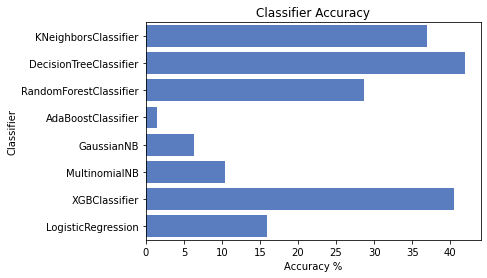

In [63]:
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

In [64]:
xgb

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

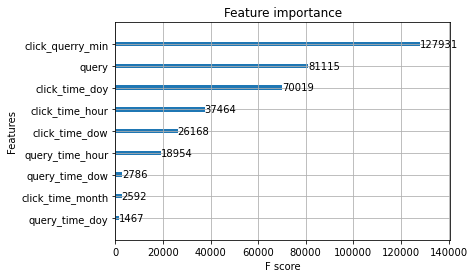

In [65]:
import xgboost as XGB
XGB.plot_importance(xgb)
plt.show()

In [66]:
import pickle
Pkl_Filename = "model.pkl"  
with open(Pkl_Filename, 'wb') as file: 
    pickle.dump(xgb, file)



    

In [67]:
with open(Pkl_Filename, 'rb') as file:
    model = pickle.load(file)
model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [68]:
model.predict(test_df)

array([1563392, 9902347, 2032076, ..., 2953607, 2467183, 9854804])